# Исследование объявлений о продаже квартир

В нашем распоряжении данные архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


# Study of ads for the sale of apartments

We have at our disposal the data of the archive of advertisements for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate. The task is to set the parameters. This will allow to build an automated system: it will track anomalies and fraudulent activity.

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically on the basis of cartographic data. For example, the distance to the center, airport, nearest park and reservoir.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


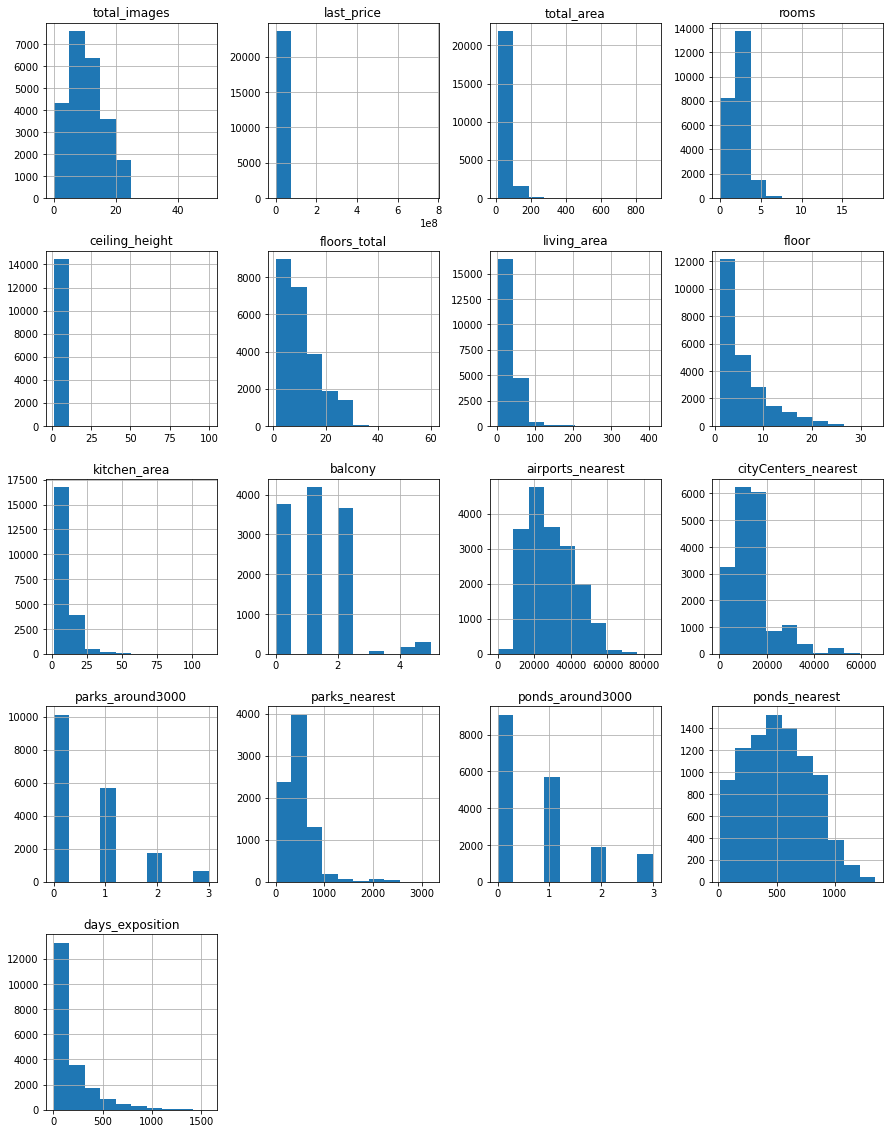

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.hist(figsize=(15, 20))

data.head(10)

### Предобработка данных

### Data preprocessing

In [3]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

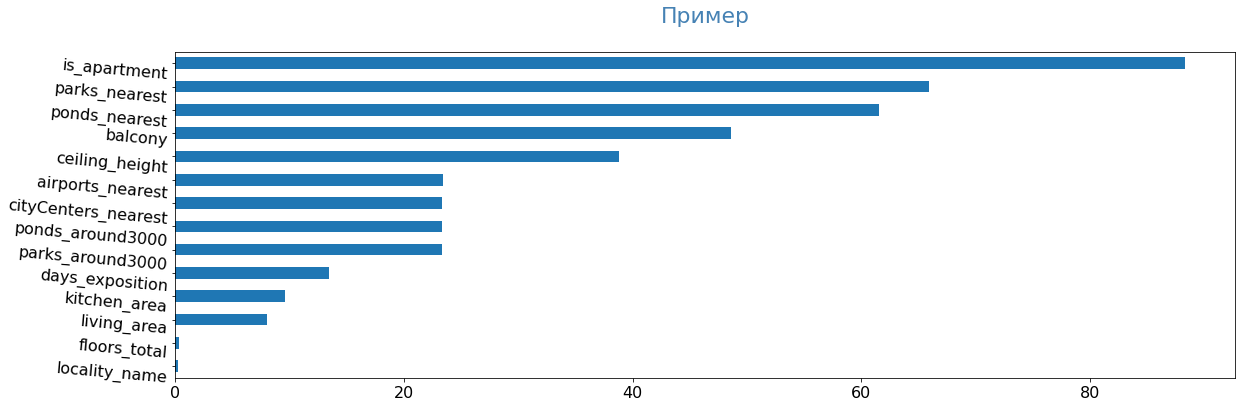

In [5]:
pass_value_barh(data)

Проверяется влияние замены на среднюю площадь. Среднее осталось прежним, значит можно применить метод к аналогичным переменным

The effect of replacement on the average area is checked. The mean remains the same, so you can apply the method to similar variables

In [6]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [7]:
(data['floors_total'] < data['floor']).value_counts()

False    23699
dtype: int64

По итогам проверки на корректность значений выявлены аномалии в данных

Based on the results of checking for the correctness of the values, anomalies in the data were revealed

In [8]:
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)


Вероятно, под отсутствием значений имеется в виду отсутствие балкона, статуса апартаментов и т.д., поэтрму заполняем пропуски нулевым значением

Probably, the absence of values means the absence of a balcony, the status of an apartment, etc., so we fill in the gaps with a zero value

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [10]:
data['last_price'] = pd.to_numeric(data['last_price'], errors='coerce') 
data['total_area'] = pd.to_numeric(data['total_area'], errors='coerce')
data['ceiling_height'] = pd.to_numeric(data['ceiling_height'], errors='coerce')
data['floors_total'] = pd.to_numeric(data['floors_total'], errors='coerce')
data['living_area'] = pd.to_numeric(data['living_area'], errors='coerce')
data['balcony'] = pd.to_numeric(data['balcony'], errors='coerce')
data['kitchen_area'] = pd.to_numeric(data['kitchen_area'], errors='coerce')
data['cityCenters_nearest'] = pd.to_numeric(data['cityCenters_nearest'], errors='coerce')
data['airports_nearest'] = pd.to_numeric(data['airports_nearest'], errors='coerce')
data['parks_around3000'] = pd.to_numeric(data['parks_around3000'], errors='coerce')
data['parks_nearest'] = pd.to_numeric(data['parks_nearest'], errors='coerce')
data['ponds_around3000'] = pd.to_numeric(data['ponds_around3000'], errors='coerce')
data['ponds_nearest'] = pd.to_numeric(data['ponds_nearest'], errors='coerce')
data['days_exposition'] = pd.to_numeric(data['days_exposition'], errors='coerce')
data['floors_total'] = pd.to_numeric(data['floors_total'], errors='coerce')

In [11]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [12]:
data['total_images'] = data['total_images'].astype('int')
data['rooms'] = data['rooms'].astype('int')
data['floor'] = data['floor'].astype('int')

In [13]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [14]:
data['locality_name'] = data['locality_name'].str.lower()

Переводим значения в нижний регистр на первом этапе избавления от неявных дупликатов

Converting values to lowercase at the first stage of getting rid of implicit duplicates

In [15]:
duplicates = ['поселок мурино', 'мурино'] # список неправильных имён

data['locality_name'] = data['locality_name'].replace(duplicates, 'посёлок мурино')
data['locality_name'] = data['locality_name'].replace('городской поселок янино-1', 'городской посёлок янино-1')
data['locality_name'] = data['locality_name'].replace('поселок аннино', 'посёлок аннино')
data['locality_name'] = data['locality_name'].replace('кудрово', 'деревня кудрово')
data['locality_name'] = data['locality_name'].replace('поселок городского типа красный бор', 'посёлок городского типа красный бор')
data['locality_name'] = data['locality_name'].replace('поселок городского типа лебяжье', 'посёлок городского типа лебяжье')
data['locality_name'] = data['locality_name'].replace('поселок городского типа кузьмоловский', 'посёлок городского типа кузьмоловский')
data['locality_name'] = data['locality_name'].replace('поселок бугры', 'посёлок бугры')
data['locality_name'] = data['locality_name'].replace('поселок городского типа рощино', 'посёлок городского типа рощино')
data['locality_name'] = data['locality_name'].replace('поселок городского типа вырица', 'посёлок городского типа вырица')



In [16]:
# check
data['locality_name'].nunique()

353

In [17]:
data.duplicated().sum()#проверяем данные на предмет наличия явных дупликатов

0

In [18]:
data['ceiling_height'].unique()#выявляем аномалии в данных

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [19]:
data['ceiling_height'].median()#выясняем медиану для замещения аномалий, медиана позволяет нивелировать влияние выбросов в данных

2.65

In [20]:

duplicates = [23, 27, 26., 22.6, 10.3, 24., 100., 25., 20., 27.5, 32, 14, 5.2, 5.6, 5.3, 8, 5, 6, 8.3, 4.65, 4.7, 4.9, 5.5, 5.8, 4.8, 4.5]
data['ceiling_height'] = data['ceiling_height'].replace(duplicates, 2.65)#замещаем аномальные значения

In [21]:
# check 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [22]:
data = data.drop(data[data['ceiling_height'] > 3].index)

In [23]:
# check
data.shape

(22219, 22)

Судя по результатам интернет-поиска, максимальная высота потолков а Санкт-Петербурге и Ленинградской области - 3 м, оставшиеся аномалии удаляем

Judging by the results of an Internet search, the maximum ceiling height in St. Petersburg and the Leningrad Region is 3 m, we remove the remaining anomalies

In [24]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных показателях 
# в выбранных параметрах о продаже квартир

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
          'kitchen_area', 'floor',       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,219.00","22,219.00","22,219.00","19,373.00","22,219.00","20,396.00","20,037.00","22,219.00","22,133.00"
min,0.00,12.00,1.00,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,3.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


In [25]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,7909
2,7543
3,5324
4,948
5,204
0,190
6,60
7,25
8,8
9,4


In [26]:
data = data.drop(data[data['rooms'] == 19].index)

Удаляем объявление о квартире с аномальным числом комнат

Delete an ad about an apartment with an abnormal number of rooms

In [27]:
data['total_area'].value_counts().to_frame()

,total_area
45.00,416
42.00,381
31.00,346
44.00,342
60.00,329
...,...
130.21,1
66.86,1
58.81,1
310.00,1


In [28]:
data = data.drop(data[data['total_area'] >= 200].index)

Удаляем объявления о квартирах с аномальной площадью квартир

We remove ads about apartments with an abnormal area of apartments

In [29]:
data['floors_total'].value_counts().to_frame()

,floors_total
5.0,5285
9.0,3728
12.0,1354
16.0,1304
10.0,1146
25.0,1073
4.0,924
17.0,819
6.0,595
3.0,572


In [30]:
data = data.drop(data[data['floors_total'] >= 30].index)

Удаляем объявления о квартирах с аномальной этажностью зданий

We remove ads about apartments with an abnormal number of storeys of buildings

In [31]:
data['last_price'].value_counts().to_frame()

,last_price
4500000.0,338
3500000.0,291
3600000.0,257
4300000.0,255
4000000.0,254
...,...
86738800.0,1
13450000.0,1
9917600.0,1
3180500.0,1


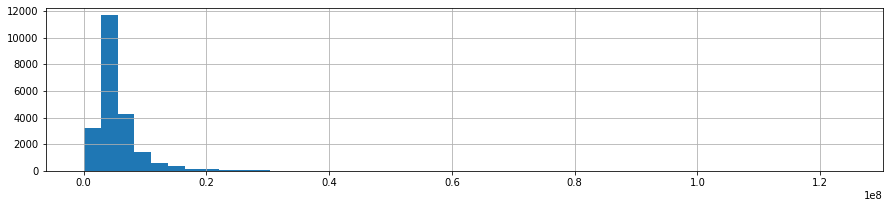

In [32]:
data.last_price.hist(bins = 45, figsize = (15,3));

In [33]:
data = data.drop(data[data['last_price'] <= 1000000].index)

Удаляем объявления о квартирах с аномальной стоимостью

We remove ads about apartments with an abnormal cost

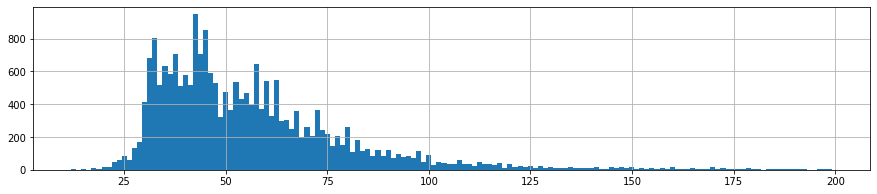

In [34]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

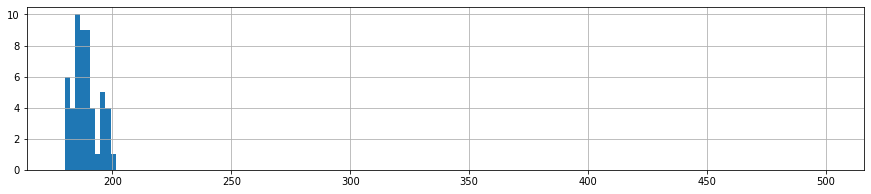

In [35]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

In [36]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир


(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,816.00","21,816.00","21,816.00","19,054.00","21,816.00","20,058.00","19,704.00","21,816.00","21,731.00"
min,0.00,12.00,1.00,1.00,"1,010,000.00",2.00,1.30,1.00,1.00
max,8.00,199.20,3.00,"1,580.00","124,000,000.00",159.60,93.00,27.00,29.00


In [37]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .976])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.01,1.00,25.00,2.50,4.00,"1,300,000.00",13.00,5.00,1.00,2.00
0.5,2.00,50.30,2.65,92.00,"4,500,000.00",29.80,9.00,5.00,9.00
0.9,3.00,86.00,2.80,444.00,"9,500,000.00",51.00,15.00,13.00,23.00
0.976,4.00,122.00,3.00,837.00,"17,000,000.00",72.00,23.00,20.00,25.00


### Посчитайте и добавьте в таблицу новые столбцы

### Count and add new columns to the table

In [38]:
data['price_per_square_meter'] = data['last_price']/data['total_area'] #цена одного квадратного метра

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['month_exposition'] = data['first_day_exposition'].dt.month#месяц публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year#год публикации объявления
data['cityCenters_nearest_km'] = data['cityCenters_nearest']//1000#расстояние до центра города в километрах
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(0)

In [39]:
def floor_categorize(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

data['floors_type'] = data.apply(floor_categorize, axis=1) #тип этажа квартиры (значения — «первый», «последний», «другой»)

### Проведите исследовательский анализ данных

### Conduct exploratory data analysis

<AxesSubplot:ylabel='Frequency'>

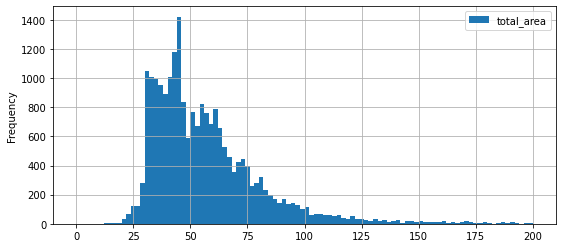

In [40]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (9,4), range = (0,200))

<AxesSubplot:ylabel='Frequency'>

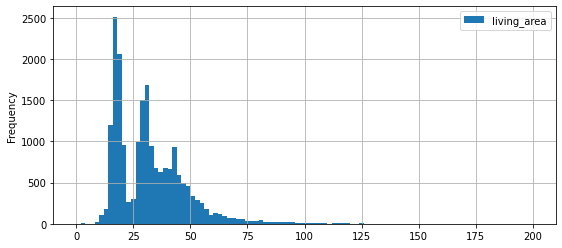

In [41]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (9,4), range = (0,200))

<AxesSubplot:ylabel='Frequency'>

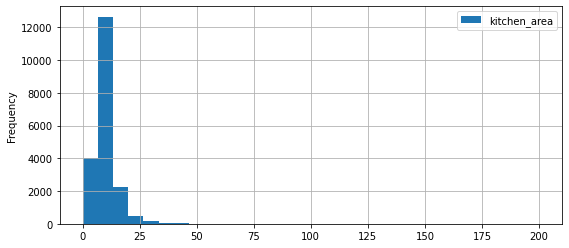

In [42]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 30, grid=True, figsize = (9,4), range = (0,200))

<AxesSubplot:ylabel='Frequency'>

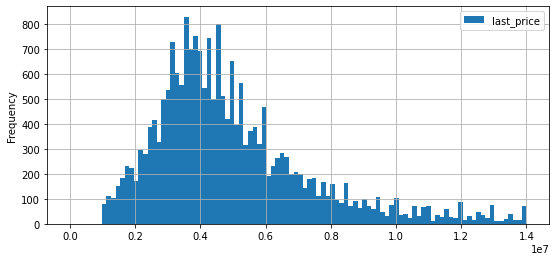

In [43]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,14000000), figsize = (9,4))

<AxesSubplot:ylabel='Frequency'>

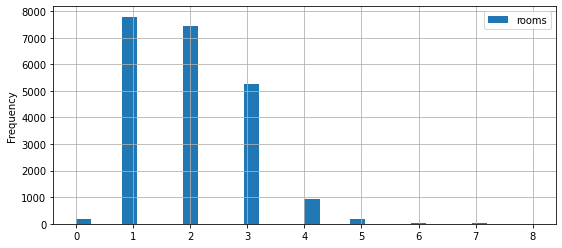

In [44]:
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (9,4))

<AxesSubplot:ylabel='Frequency'>

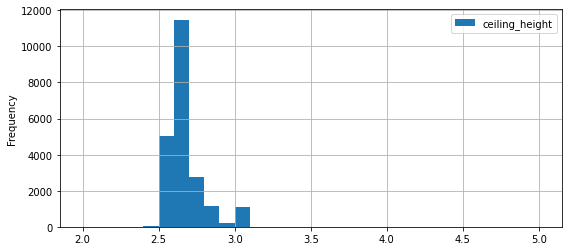

In [45]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (9,4))

<AxesSubplot:ylabel='Frequency'>

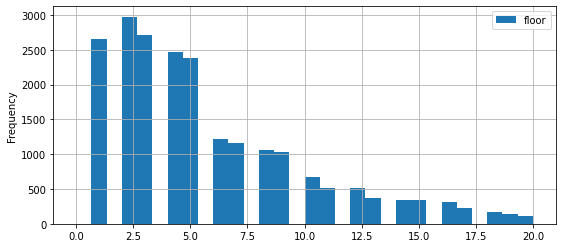

In [46]:
data.plot(y = 'floor', kind = 'hist', bins = 30, range = (0,20), grid=True, figsize = (9,4))

<AxesSubplot:>

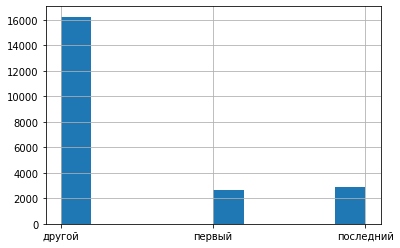

In [47]:
data['floors_type'].hist()

<AxesSubplot:ylabel='Frequency'>

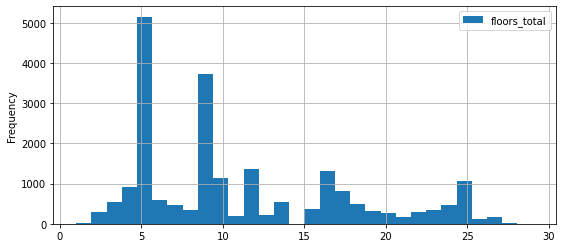

In [48]:
data.plot(y = 'floors_total', kind = 'hist', bins = 30, grid=True, figsize = (9,4))

<AxesSubplot:ylabel='Frequency'>

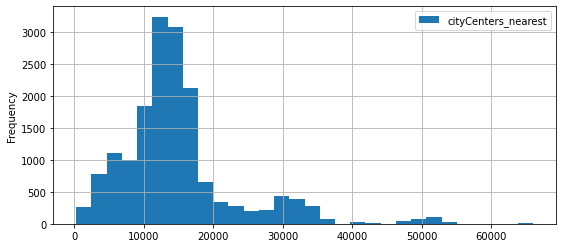

In [49]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 30, grid=True, figsize = (9,4))

<AxesSubplot:ylabel='Frequency'>

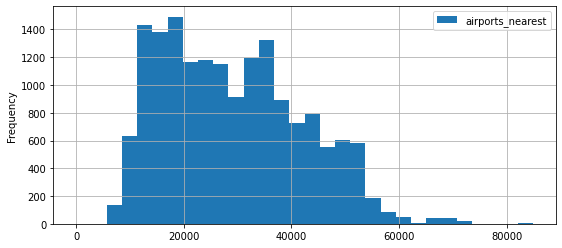

In [50]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 30, grid=True, figsize = (9,4))

<AxesSubplot:ylabel='Frequency'>

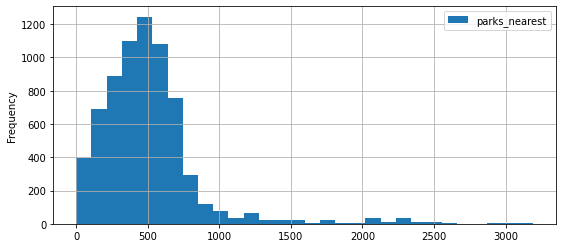

In [51]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 30, grid=True, figsize = (9,4))

<AxesSubplot:ylabel='Frequency'>

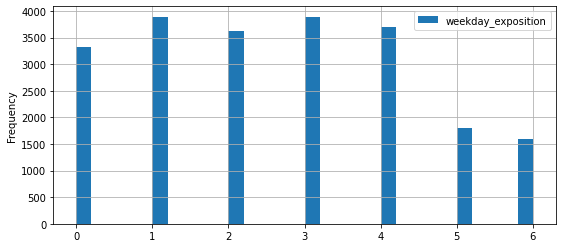

In [52]:
data.plot(y = 'weekday_exposition', kind = 'hist', bins = 30, grid=True, figsize = (9,4))

<AxesSubplot:ylabel='Frequency'>

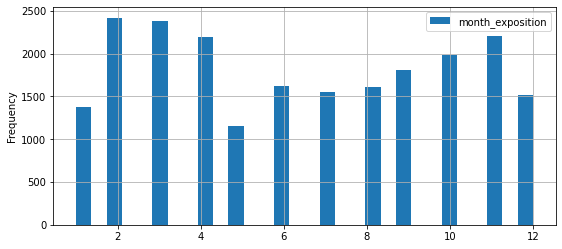

In [53]:
data.plot(y = 'month_exposition', kind = 'hist', bins = 30, grid=True, figsize = (9,4))

Можно сделать следующие выводы:

Общая площадь в нашей выборке колеблется от 12 до 400 м2, выше 100 м2 число объектов недвижимости резко спадает. Параметры жилой недвижимости и цены имеют схожий типа распределения данных.

Количество комнат распределено неравномерно и колеблется от 1 до 19. Больше всего однокомнатных и двухкомнатных квартир.

Высота потолков чаще всего составляет 2,7 м.

Этажность продающейся недвижимости в большинстве своем находится в пределах 5 этажей.

Число объявлений о продажах недвижимости на первом и последнем этажах примерно на одном уровне, горазде чаще продаются объекты на других этажах.

Этажность строения в целом чаще всего представлена домами в 5 и 10 этажей.

Чаще всего продается недвижимость примерно в 12-16 тыс м от центра.

В-основном недвижимость находится в пределах 500 м от парка и 19-22 тыс м от аэропорта.

Явной зависимости между днем или месяцем и количеством объявлений о продаже не выявлено.

_______________________________________________________________________________________________________________________________

The following conclusions can be drawn:

The total area in our sample ranges from 12 to 400 m2, above 100 m2 the number of properties drops sharply. Residential real estate parameters and prices have a similar type of data distribution.

The number of rooms is distributed unevenly and ranges from 1 to 19. Most of all are one-room and two-room apartments.

The height of the ceilings is most often 2.7 m.

The number of floors of real estate for sale is mostly within 5 floors.

The number of real estate sales ads on the first and last floors is approximately the same, properties on other floors are sold much more often.

The number of storeys of the building as a whole is most often represented by houses of 5 and 10 floors.

Most often, real estate is sold approximately 12-16 thousand meters from the center.

Basically, the property is located within 500 meters from the park and 19-22 thousand meters from the airport.

No clear relationship was found between the day or month and the number of sales ads.

In [ ]:
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

<AxesSubplot:ylabel='Frequency'>

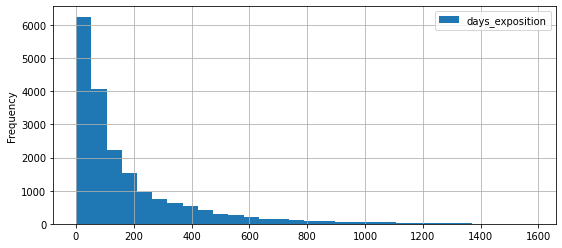

In [54]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid=True, figsize = (9,4))#изучаем, как быстро продавалась недвижимость 

In [55]:
data['days_exposition'].mean()

175.14238480109162

In [56]:
data['days_exposition'].median()

92.0

Чаще всего недвижимость продается в пределах 100 дней после размещения объявления о продаже, судя по значению медианы в 95 дней. Однако есть объекты, проданные только после 1300 дней после размещения объявления, хотя и крайне мало. 

Most properties are sold within 100 days of the listing, based on a median of 95 days. However, there are properties sold only after 1300 days after the ad was placed, although very few.

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21816 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            21816 non-null  int64         
 1   last_price              21816 non-null  float64       
 2   total_area              21816 non-null  float64       
 3   first_day_exposition    21816 non-null  datetime64[ns]
 4   rooms                   21816 non-null  int64         
 5   ceiling_height          21816 non-null  float64       
 6   floors_total            21731 non-null  float64       
 7   living_area             20058 non-null  float64       
 8   floor                   21816 non-null  int64         
 9   is_apartment            21816 non-null  object        
 10  studio                  21816 non-null  bool          
 11  open_plan               21816 non-null  bool          
 12  kitchen_area            19704 non-null  float6

0.7192018334839914

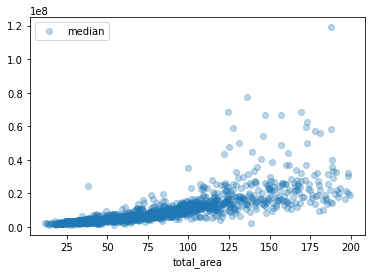

In [58]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o', alpha=0.3)

pivot_table_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['last_price'])

0.600570399098619

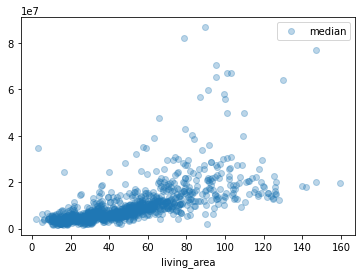

In [59]:
pivot_table_total_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o', alpha=0.3)

pivot_table_total_area.sort_values('median', ascending = False)

data['living_area'].corr(data['last_price'])

0.5479081839152702

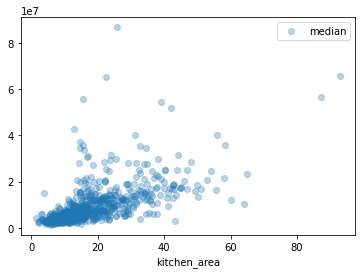

In [60]:
pivot_table_total_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o', alpha=0.3)

pivot_table_total_area.sort_values('median', ascending = False)

data['kitchen_area'].corr(data['last_price'])

По итогам анализа видим, что зависимость существует, хотя и довольно слабая. То есть, чем больше площадь тем немного выше стоимость.

Based on the results of the analysis, we see that the dependence exists, although it is rather weak. That is, the larger the area, the slightly higher the cost.

In [61]:
data['rooms'].unique()

array([3, 1, 2, 4, 5, 6, 0, 7, 8])

0.41940275706217633

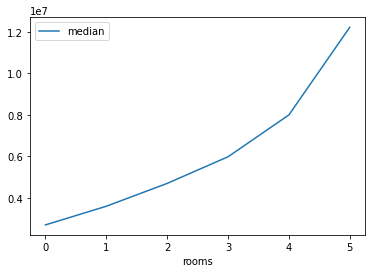

In [62]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

data['rooms'].corr(data['last_price'])

По итогам видим, что существует прямая зависимость между конечной стоимостью недвижимости и количеством комнат

As a result, we see that there is a direct relationship between the final cost of real estate and the number of rooms

<AxesSubplot:xlabel='floors_type'>

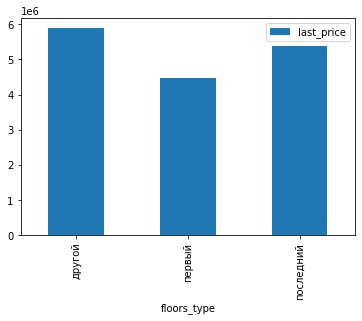

In [63]:
data.pivot_table(index='floors_type', values='last_price').plot.bar()


Здесь видно, что этаж квартиры квартиры напрямую влияет на стоимость недвижимости (первый этаж непопулярен по сравнению с последними или иными этажами) 

Here you can see that the floor of the apartment of the apartment directly affects the value of the property (the first floor is unpopular compared to the last or other floors)

,mean,count,median
weekday_exposition,,,
1,5.668313e+06,3879,4600000.0
2,5.611966e+06,3632,4539000.0
0,5.668415e+06,3323,4500000.0
3,5.745001e+06,3892,4500000.0
5,5.718136e+06,1797,4500000.0
6,5.529370e+06,1594,4500000.0
4,5.581435e+06,3699,4488000.0


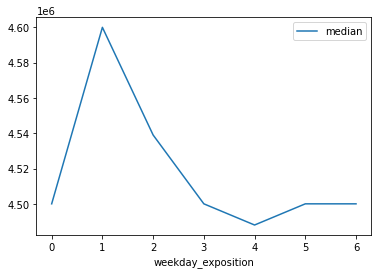

In [64]:
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

,mean,count,median
month_exposition,,,
4,5.634476e+06,2197,4680000.0
11,5.777949e+06,2204,4570000.0
12,5.890077e+06,1512,4550000.0
9,5.653437e+06,1809,4530000.0
1,5.655460e+06,1374,4500000.0
2,5.659239e+06,2419,4500000.0
3,5.514216e+06,2380,4500000.0
8,5.739206e+06,1614,4500000.0
10,5.587956e+06,1982,4500000.0


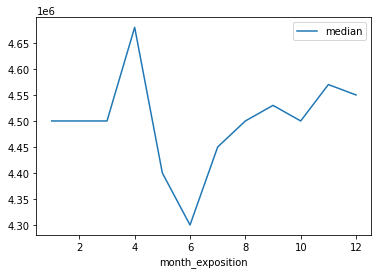

In [65]:
pivot_table_weekday_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

,mean,count,median
year_exposition,,,
2014,1.054949e+07,121,7500000.0
2015,6.762224e+06,1060,5017859.5
2019,6.014785e+06,2635,4950000.0
2018,5.407724e+06,7890,4500000.0
2016,5.632181e+06,2527,4350000.0
2017,5.552934e+06,7583,4350000.0


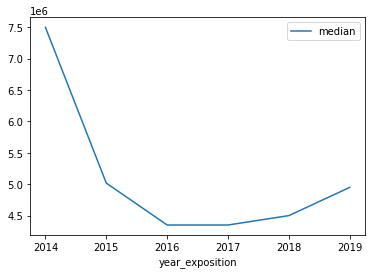

In [66]:
pivot_table_weekday_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

Согласно анализу, неоднозначно на стоимость недвижимости влияют день, месяц, год размещения. По какой-то причине по наибольшей цене продается недвижимость, обьявление которой было выставлено во вторник, при этом пятница неудачный день с этой стороны. Данный вопрос требует дополнительного изучения.
Рынок также имеет явную сезонность, активнее всего он себя проявляет весной, с "проседаением" в июне.
По годам мы видимо, что в период с 2015-2016 годы происходит постепенный спад спроса на покупку недвижимости, однако в 2017 году наметился рост стоимости недвижимости, а значит и рост спроса.

According to the analysis, the day, month, year of placement ambiguously affect the value of real estate. For some reason, the highest bidding property is listed on Tuesday, and Friday is a bad day on that side. This issue requires further study.
The market also has a clear seasonality, it manifests itself most actively in the spring, with a "subsidence" in June.
Over the years, we see that in the period from 2015-2016 there is a gradual decline in demand for the purchase of real estate, but in 2017 there has been an increase in the value of real estate, and hence an increase in demand.

In [67]:
#посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table.sort_values('count', ascending = False).head(10)

,count,mean
locality_name,,
санкт-петербург,14210,111138.419078
посёлок мурино,590,86087.512050
деревня кудрово,472,95324.930544
посёлок шушары,439,78655.103087
всеволожск,393,68665.901153
пушкин,347,102298.577380
колпино,327,75375.283038
посёлок парголово,326,90332.263023
гатчина,301,68824.243947


In [68]:
#самая высокая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]

,count,mean
locality_name,,
посёлок лисий нос,2,121616.221359


In [69]:
#самая низкая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
поселок житково,1,15648.28614


Итог: самая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, тогда как самая низкая стоимость в Выборге.

Bottom line: the highest cost of housing out of 10 settlements with the largest number of ads is in St. Petersburg, while the lowest cost is in Vyborg.

In [70]:
data.query('locality_name == "санкт-петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,cityCenters_nearest_km,floors_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,0,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,16.0,другой
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,0,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,13.0,другой
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,0,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,6.0,другой
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,0,...,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,11.0,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.6,7,0,...,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,15.0,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.0,39.00,2017-12-16,1,2.65,9.0,20.0,6,0,...,NaN,0.0,NaN,38.0,82051.282051,5,12,2017,16.0,другой
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,4,0,...,353.0,2.0,652.0,29.0,100566.572238,2,2,2018,16.0,другой
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5.0,31.0,2,0,...,300.0,0.0,NaN,15.0,105769.230769,3,7,2018,6.0,другой
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,0,...,NaN,1.0,806.0,519.0,129903.978052,3,10,2016,4.0,другой


<AxesSubplot:xlabel='cityCenters_nearest_km'>

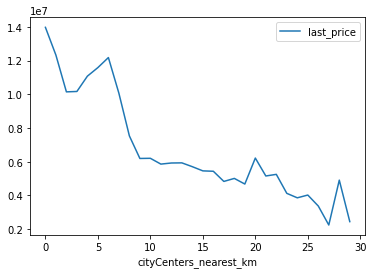

In [71]:
pivot_table_km = data.query('locality_name == "санкт-петербург"').pivot_table(index = 'cityCenters_nearest_km', 
                                                                              values = 'last_price', 
                                                                              aggfunc = 'mean')

pivot_table_km.plot()


### Общий вывод

### General conclusion

    Для исследования был дан массив со статистическими данными продажи недвижимости в Санкт-Петербурге и Ленинградской области. Были обработаны пропущенные значения там, где это необходимо, а также заменен тип данных в определенных столбцах для удобной работы.  Были изучены следующие параметры с помощью гистограмм - общая площадь; жилая площадь; площадь кухни; цена объекта; количество комнат; высота потолков; этаж квартиры; тип этажа квартиры («первый», «последний», «другой»); общее количество этажей в доме; расстояние до центра города в метрах; расстояние до ближайшего аэропорта; расстояние до ближайшего парка; день и месяц публикации объявления. 
    По результатам исследования данных было выявлено, что значения продаж квартир варьируются в большом диапазоне чисел, в среднем продаваясь за 180 дней при медиане в 95 дней. Также выявлено, что на стоимость квадратного метра квартиры больше всего влияют следующие факторы:
 - количество комнат (чем больше количество комнат, тем выше цена недвижимости)
 - этаж квартиры (крайне непопулярен первый этаж по сравнению с последними или иными этажами) 
  - общая и жилая площади. 
    Неоднозначно на стоимость недвижимости влияют день, месяц, год размещения. По какой-то причине по наибольшей цене продается недвижимость, обьявление которой было выставлено во вторник, при этом пятница неудачный день с этой стороны. Данный вопрос требует дополнительного изучения.
    Рынок также имеет явную сезонность, активнее всего он себя проявляет весной, с "проседаением" в июне.
    По годам мы видимо, что в период с 2015-2016 годы происходит постепенный спад спроса на покупку недвижимости, однако в 2017 году наметился рост стоимости недвижимости, а значит и рост спроса.
    Было также выявлено, что из рассмотренных населенных пунктов самая дорогая недвижимость в Санкт-Петербурге, а самая низкая стоимость в Выборге.
    Судя по анализу стоимости недвижимости с учетом удаленности от центра, существует обратная зависимость, чем дальше от центра Санкт-Петербурга - тем дешевле недвижимость. Однако имеется резкий скачаок цены на расстоянии примерно 27 км от центра, вероятно, там находится коттеджный поселок.
    
________________________________________________________________________________________________________________________________

For the study, an array was given with statistical data on the sale of real estate in St. Petersburg and the Leningrad Region. Missing values have been handled where necessary, and the data type has been changed in certain columns for a better experience. The following parameters were studied using histograms - total area; living space; kitchen area; object price; number of rooms; ceiling height; floor of the apartment; floor type of the apartment (“first”, “last”, “other”); the total number of floors in the house; distance to the city center in meters; distance to the nearest airport; distance to the nearest park; day and month of publication of the announcement.
     Based on the results of the data analysis, it was found that the sales values of apartments vary in a wide range of numbers, with an average of 180 days sold with a median of 95 days. It was also revealed that the following factors most influence the cost per square meter of an apartment:
  - number of rooms (the more rooms, the higher the price of the property)
  - the floor of the apartment (the first floor is extremely unpopular compared to the last or other floors)
   - common and residential area.
     The value of real estate is ambiguously affected by the day, month, year of placement. For some reason, the highest bidding property is listed on Tuesday, and Friday is a bad day on that side. This issue requires further study.
     The market also has a clear seasonality, it manifests itself most actively in the spring, with a "subsidence" in June.
     Over the years, we see that in the period from 2015-2016 there is a gradual decline in demand for the purchase of real estate, but in 2017 there has been an increase in the value of real estate, and hence an increase in demand.
     It was also revealed that of the settlements considered, the most expensive real estate is in St. Petersburg, and the lowest cost is in Vyborg.
     Judging by the analysis of the value of real estate, taking into account the distance from the center, there is an inverse relationship, the farther from the center of St. Petersburg - the cheaper the property. However, there is a sharp jump in prices at a distance of about 27 km from the center, probably there is a cottage settlement.
  